In [34]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt

$$
\begin{aligned}
\hat{H} &= \hat{H}_{\mathrm{2ph}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_{\mathrm{2ph}} &= g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,\\
\hat{H}_d &= \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
\end{aligned}
$$

In [15]:
import dynamiqs as dq
dq.set_device('cpu')

na = 20  
# Fock states for subsystem A
nb = 5   

#identity operators for each subsystem
Ia = dq.eye(na)
Ib = dq.eye(nb)

a = dq.destroy(na)
b = dq.destroy(nb)

# Embed operators into the composite Hilbert space
a_tensored = dq.tensor(a, Ib)    
adag_tensored = dq.dag(a_tensored)
b_tensored = dq.tensor(Ia, b)     
bdag_tensored = dq.dag(b_tensored)

g2 = 1.0
eps = -4.0

H2ph = g2 * (adag_tensored @ adag_tensored @ b_tensored) + g2.conjugate() * (a_tensored @ a_tensored @ bdag_tensored)

# Drive term: eps (I_a ⊗ b†) + eps* (I_a ⊗ b)
Hd = eps * bdag_tensored + eps.conjugate() * b_tensored

# Full Hamiltonian
H = H2ph + Hd  # Now all terms act on the composite space (na ⊗ nb)

In [31]:
T = 4
psi0a = dq.fock(na,0)
psi0b = dq.fock(nb,0)
psi0 = dq.tensor(psi0a, psi0b)
t_save = jnp.linspace(0, T, 50)  # save times
result = dq.sesolve(H, psi0, t_save)
print(result)

|██████████| 100.0% ◆ elapsed 11.21ms ◆ remaining 0.00ms

==== SESolveResult ====
Solver : Tsit5
Infos  : 81 steps (78 accepted, 3 rejected)
States : QArray complex64 (50, 100, 1) | 39.1 Kb


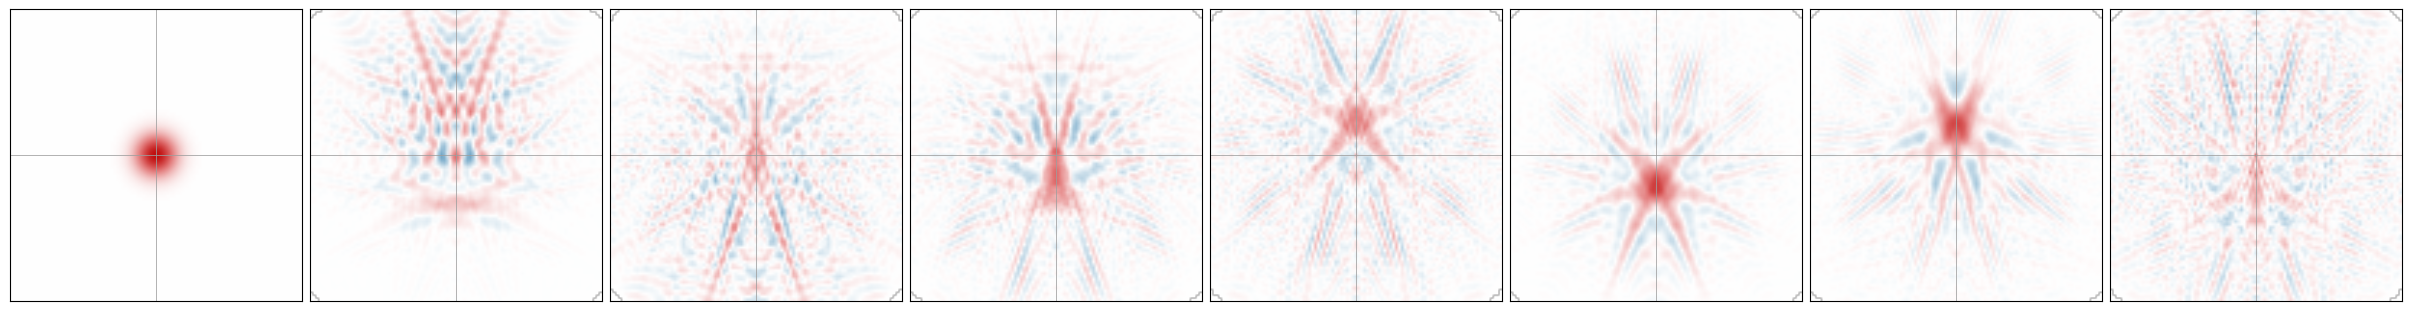

In [32]:
dq.plot.wigner_mosaic(result.states, cross = True)

100%|██████████| 50/50 [00:06<00:00,  7.44it/s]


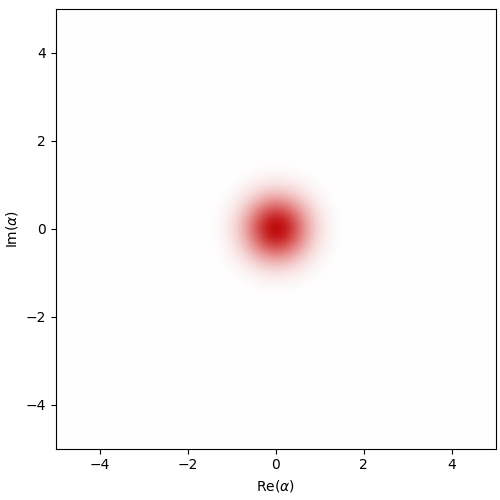

In [33]:
dq.plot.wigner_gif(result.states, gif_duration = 2, fps = 25)

https://www.dynamiqs.org/stable/documentation/getting_started/sharp-bits.html